## Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент компании «Мегалайн» хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна» за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Цель определила следующие задачи:

1. изучить файлы с данными

2. провести предобработку данных и расчитать выручку

3. проанализировать данные

4. проверить гипотезы: 
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Шаг 1. Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [2]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [9]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
for column in users.columns:
    if users[column].dtype == 'object':
        
        print(column)
        
        print()
        
        print(users[column].unique())
        
        print()
    
    else:
        
        print(column)
        
        print()
        
        print(users[column].describe())
        
        print() 

user_id

count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64

age

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

churn_date

[nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03' '2018-10-14'
 '2018-12-09' '2018-12-11' '2018-12-26' '2018-08-31' '2018-12-03'
 '2018-12-23' '2018-11-07' '2018-12-16' '2018-12-20' '2018-11-30'
 '2018-12-21' '2018-08-17' '2018-09-02' '2018-10-04' '2018-11-13'
 '2018-11-22' '2018-10-28' '2018-11-26' '2018-11-27' '2018-11-16'
 '2018-10-27' '2018-12-30' '2018-09-27' '2018-12-25' '2018-12-14'
 '2018-12-24' '2018-09-26' '2018-10-25']

city

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново'

In [12]:
for column in calls.columns:
    if calls[column].dtype == 'object':
        
        print(column)
        
        print()
        
        print(calls[column].unique())
        
        print()
    
    else:
        
        print(column)
        
        print()
        
        print(calls[column].describe())
        
        print()

id

['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']

call_date

['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-09-30' '2018-11-09' '2018-08-01' '2018-06-18' '2018-1

In [13]:
for column in internet.columns:
    if internet[column].dtype == 'object':
        
        print(column)
        
        print()
        
        print(internet[column].unique())
        
        print()
    
    else:
        
        print(column)
        
        print()
        
        print(internet[column].describe())
        
        print()

Unnamed: 0

count    149396.000000
mean      74697.500000
std       43127.054745
min           0.000000
25%       37348.750000
50%       74697.500000
75%      112046.250000
max      149395.000000
Name: Unnamed: 0, dtype: float64

id

['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']

mb_used

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

session_date

['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'

In [14]:
for column in messages.columns:
    if messages[column].dtype == 'object':
        
        print(column)
        
        print()
        
        print(messages[column].unique())
        
        print()
    
    else:
        
        print(column)
        
        print()
        
        print(messages[column].describe())
        
        print()

id

['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']

message_date

['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-21' '2018-07-11' '2018-07-16' '2018-11-08' '2018-07-25'
 '2018-09-13' '2018-08-13' '2018-12-31' '2018-06-10' '201

#### Вывод

У нас имеются таблицы: users, calls, messages, internet, tariffs.

Для того чтобы решить вышеуказанные задачи, необходимо будет объединить эти таблицы.

Прежде чем это сделать, необходимо обработать данные. В таблице users обнаружены пропуски в столбце `churn_date`. Также следует изменить формат столбцов, в которых указаны даты. 

Кроме этого столбцах с минутами и мегабайтами обнаружен вещественный тип данных.

### Шаг 2. Подготовьте данные

#### 2.1 Обработка данных

В столбце `duraton` обнаружены нули, т.е. пропущенные звонки. Проверим, насколько их много.

In [15]:
len(calls.query('duration == 0'))/len(calls)

0.19551644316336553

Пропущенные звонки составляют 20%. Так как удаление этих строк на результат исследования не повлияет, избавимся от них, чтобы не перегружать лишними данными.

In [16]:
calls = calls.query('duration != 0')

Поскольку имеем небольшую выборку, заполним пропущенные значения в столбце `churn date` техническим значением. Так как имеем выборку всего из 500 пользователей, не стоит терять данные.

In [17]:
users['churn_date'] = users['churn_date'].fillna(0000-00-00)

In [18]:
print('Количество пропусков в столбце churn date равно: {}'.format(users['churn_date'].isna().sum()))

Количество пропусков в столбце churn date равно: 0


Переводим столбцы `churn_date`, `reg_date`, `message_date`, `session_date`, `call_date` в формат даты.

In [19]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [21]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Тип данных столбцов `duration` и `mb_used` изменяем на целочисленный и округляем в большую сторону, поскольку при расчете платежа оператор всегда округляет вверх значения минут и мегабайтов

In [24]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)

Чтобы сгруппировать данные по месяцам и в дальнейшем произвести расчет выручки, сократим даты до месяца.

In [26]:
calls['month'] = calls['call_date'].astype('datetime64[M]')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
messages['month'] = messages['message_date'].astype('datetime64[M]')

In [28]:
internet['month'] = internet['session_date'].astype('datetime64[M]')

#### 2.2 Расчет помесячной выручки с каждого пользователя

Чтобы посчитать выручку, сначала группируем таблицы по `user_id` и месяцам и считаем: 

-количество сделанных звонков и израсходованных минут разговора

-количество отправленных сообщений по месяцам

-объем израсходованного интернет-трафика по месяцам.

In [29]:
user_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'duration': 'call_duration', 'id':'number_of_calls'})
                  
user_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'number_of_messages'})
                    
user_internet = internet.groupby(['user_id', 'month']) .agg({'mb_used':'sum'}).reset_index()              

In [30]:
user_calls

,user_id,month,call_duration,number_of_calls
0,1000,2018-05-01,159,17
1,1000,2018-06-01,172,28
2,1000,2018-07-01,340,41
3,1000,2018-08-01,408,42
4,1000,2018-09-01,466,46
...,...,...,...,...
3163,1498,2018-10-01,247,30
3164,1499,2018-09-01,70,8
3165,1499,2018-10-01,449,44
3166,1499,2018-11-01,612,62


In [31]:
user_calls['number_of_calls'].sum() #по суммам количества звонков, смс и мегабайтов произведем контрольное сравнение после соединения таблиц

162994

In [32]:
user_messages

,user_id,month,number_of_messages
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


In [33]:
user_messages['number_of_messages'].sum()

123036

In [34]:
user_internet

,user_id,month,mb_used
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016
3,1000,2018-08-01,14070
4,1000,2018-09-01,14581
...,...,...,...
3198,1498,2018-10-01,20604
3199,1499,2018-09-01,1848
3200,1499,2018-10-01,17809
3201,1499,2018-11-01,17984


In [35]:
user_internet['mb_used'].sum()

55369459

In [36]:
df = user_messages.merge(user_internet, on=['user_id', 'month'], how='outer') #соединяем три таблицы в одну так, чтобы общими оказались user_id и month
df = df.merge(user_calls, on=['user_id', 'month'], how='outer')

In [37]:
df

,user_id,month,number_of_messages,mb_used,call_duration,number_of_calls
0,1000,2018-05-01,22.0,2256.0,159.0,17.0
1,1000,2018-06-01,60.0,23257.0,172.0,28.0
2,1000,2018-07-01,75.0,14016.0,340.0,41.0
3,1000,2018-08-01,81.0,14070.0,408.0,42.0
4,1000,2018-09-01,57.0,14581.0,466.0,46.0
...,...,...,...,...,...,...
3209,1494,2018-08-01,NaN,6601.0,262.0,26.0
3210,1494,2018-09-01,NaN,16986.0,501.0,57.0
3211,1494,2018-10-01,NaN,17794.0,354.0,45.0
3212,1494,2018-11-01,NaN,18076.0,411.0,46.0


In [38]:
df['number_of_calls'].sum() 

162994.0

In [39]:
df['number_of_messages'].sum()

123036.0

In [40]:
df['mb_used'].sum()

55369459.0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id               3214 non-null int64
month                 3214 non-null datetime64[ns]
number_of_messages    2717 non-null float64
mb_used               3203 non-null float64
call_duration         3168 non-null float64
number_of_calls       3168 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 175.8 KB


Так как данные в столбцах `number_of_messages` и `mb_used` уже сгруппированы, можем заполнить пропуски техническими нулями, чтобы не терять данные о звонках и не искажать.

In [42]:
df = df.fillna(0)

In [43]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [44]:
user_tariff = users.merge(tariffs, on=['tariff'], how='outer')

In [45]:
user_tariff

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,1970-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,1970-01-01,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,1970-01-01,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,62,1970-01-01,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
496,1496,36,1970-01-01,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,1970-01-01,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


In [46]:
df = df.merge(user_tariff, on=['user_id'], how='outer')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
month                    3214 non-null datetime64[ns]
number_of_messages       3214 non-null float64
mb_used                  3214 non-null float64
call_duration            3214 non-null float64
number_of_calls          3214 non-null float64
age                      3216 non-null int64
churn_date               3216 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64

In [48]:
df[['number_of_messages', 'mb_used', 'call_duration', 'number_of_calls']] = df[['number_of_messages', 'mb_used', 'call_duration', 'number_of_calls']].fillna(0)

In [49]:
df['month'] = df['month'].fillna('1970-01-01')

In [50]:
df

,user_id,month,number_of_messages,mb_used,call_duration,number_of_calls,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01 00:00:00,22.0,2256.0,159.0,17.0,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01 00:00:00,60.0,23257.0,172.0,28.0,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01 00:00:00,75.0,14016.0,340.0,41.0,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01 00:00:00,81.0,14070.0,408.0,42.0,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01 00:00:00,57.0,14581.0,466.0,46.0,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1494,2018-10-01 00:00:00,0.0,17794.0,354.0,45.0,62,1970-01-01,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3212,1494,2018-11-01 00:00:00,0.0,18076.0,411.0,46.0,62,1970-01-01,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3213,1494,2018-12-01 00:00:00,0.0,17645.0,418.0,54.0,62,1970-01-01,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3214,1128,1970-01-01,0.0,0.0,0.0,0.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1


In [51]:
df['number_of_calls'].sum()

162994.0

Находим помесячную выручку с каждого пользователя. Для этого создаем функцию, которая на входе принимает значения из необходимых нам столбцов с количеством сообщений, минут звонков и использованных мегабайтов.

In [52]:
def above_the_tariff(row):
    messages = (row['number_of_messages'] - row['messages_included']) * row['rub_per_message'] #вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана
    minutes = (row['call_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_used'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [messages, minutes, mbs]:
        if i > 0:
            total += i
    return total
 
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)

In [53]:
revenue = df.groupby(['user_id', 'month', 'tariff', 'city'])['above_the_tariff'].sum().reset_index() #складываем превышающие тариф значения, сгруппировав по пользователям, тарифу, городу и месяцу

In [54]:
revenue

,user_id,month,tariff,city,above_the_tariff
0,1000,2018-05-01,ultra,Краснодар,0.0
1,1000,2018-06-01,ultra,Краснодар,0.0
2,1000,2018-07-01,ultra,Краснодар,0.0
3,1000,2018-08-01,ultra,Краснодар,0.0
4,1000,2018-09-01,ultra,Краснодар,0.0
...,...,...,...,...,...
3211,1498,2018-10-01,smart,Владикавказ,1025.0
3212,1499,2018-09-01,smart,Пермь,0.0
3213,1499,2018-10-01,smart,Пермь,479.0
3214,1499,2018-11-01,smart,Пермь,876.0


Прибавляем абонентскую плату, соответствующую тарифному плану и находим среднюю помесячную прибыль с каждого пользователя.

In [55]:
revenue['revenue'] = revenue['above_the_tariff'] + df['rub_monthly_fee']

In [56]:
revenue = revenue.groupby(['user_id', 'tariff', 'city'])['revenue'].mean().reset_index()
revenue

,user_id,tariff,city,revenue
0,1000,ultra,Краснодар,1950.000000
1,1001,smart,Москва,852.000000
2,1002,smart,Стерлитамак,1358.000000
3,1003,ultra,Москва,1950.000000
4,1004,ultra,Новокузнецк,1600.000000
...,...,...,...,...
495,1495,ultra,Иркутск,2261.800000
496,1496,smart,Вологда,3450.166667
497,1497,smart,Челябинск,893.333333
498,1498,smart,Владикавказ,1583.000000


In [57]:
print('Суммарная ежемесячная прибыль тарифа Ультра: {}.'.format(revenue[revenue['tariff'] == 'ultra']['revenue'].sum()))

Суммарная ежемесячная прибыль тарифа Ультра: 160586.63077200577.


In [58]:
print('Суммарная ежемесячная прибыль тарифа Смарт: {}.'.format(revenue[revenue['tariff'] == 'smart']['revenue'].sum()))

Суммарная ежемесячная прибыль тарифа Смарт: 600765.1864718614.


In [59]:
print('Ежемесячная прибыль тарифа Ультра в среднем с одного пользователя: {}.'.format(revenue[revenue['tariff'] == 'ultra']['revenue'].mean()))

Ежемесячная прибыль тарифа Ультра в среднем с одного пользователя: 1077.7626226309112.


In [60]:
print('Ежемесячная прибыль тарифа Смарт в среднем с одного пользователя: {}.'.format(revenue[revenue['tariff'] == 'smart']['revenue'].mean()))

Ежемесячная прибыль тарифа Смарт в среднем с одного пользователя: 1711.5817278400611.


### Вывод

Были заполнены пропущенные значения в столбце churn date. Столбцы churn_date, reg_date, message_date, session_date, call_date были переведены в формат даты. Тип данных столбцов duration и mb_used мы изменинили на целочисленный и округлили в большую сторону, поскольку при расчете платежа оператор всегда округляет вверх значения минут и мегабайтов.

Затем был произведен расчет помесячной выручки с каждого пользователя. Мы выяснили, что суммарно больше прибыль приносят пользователи, пользующиеся тарифом Смарт. Из этого можно сделать вывод, что этот тариф лучше. Но прежде всего необходимо проверить, насколько случайным является полученный результат. 

### Шаг 3. Проанализируйте данные

Чтобы проанализировать распределение данных в зависимости от тарифа, создаем две таблицы: данные о пользователях тарифов Ультра и Смарт.

In [61]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

Выводим средние значения и стандартное отклонение.

In [62]:
for column in ultra[['call_duration', 'number_of_messages', 'mb_used']]:
        print(column)
        
        print()
        
        print(ultra[column].describe())
        
        print()

call_duration

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: call_duration, dtype: float64

number_of_messages

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: number_of_messages, dtype: float64

mb_used

count      986.000000
mean     19467.137931
std      10110.255401
min          0.000000
25%      11761.000000
50%      19320.000000
75%      26860.250000
max      49789.000000
Name: mb_used, dtype: float64



In [63]:
for column in smart[['call_duration', 'number_of_messages', 'mb_used']]:
        print(column)
        
        print()
        
        print(smart[column].describe())
        
        print()

call_duration

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: call_duration, dtype: float64

number_of_messages

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: number_of_messages, dtype: float64

mb_used

count     2230.000000
mean     16221.910762
std       5886.299627
min          0.000000
25%      12645.250000
50%      16529.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64



In [64]:
variance_call_ultra = np.var(ultra['call_duration'], ddof=1)
variance_message_ultra = np.var(ultra['number_of_messages'], ddof=1)
variance_mb_ultra = np.var(ultra['mb_used'], ddof=1)

print('Дисперсия количества минут пользователей тарифа Ультра: {}.'.format(variance_call_ultra))
print('Дисперсия количества сообщений пользователей тарифа Ультра: {}.'.format(variance_message_ultra))
print('Дисперсия количества Мб пользователей тарифа Ультра: {}.'.format(variance_mb_ultra))

Дисперсия количества минут пользователей тарифа Ультра: 101052.49354928387.
Дисперсия количества сообщений пользователей тарифа Ультра: 2285.417424655842.
Дисперсия количества Мб пользователей тарифа Ультра: 102217264.27537195.


In [65]:
std_call = np.std(ultra['call_duration'], ddof=1)
std_message = np.std(ultra['number_of_messages'], ddof=1)
std_mb = np.std(ultra['mb_used'], ddof=1)

print('Стандартное отклонение количества минут пользователей тарифа Ультра: {}.'.format(std_call))
print('Стандратное отклонение сообщений пользователей тарифа Ультра: {}.'.format(std_message))
print('Стандартное отклонение Мб пользователей тарифа Ультра: {}.'.format(std_mb))

Стандартное отклонение количества минут пользователей тарифа Ультра: 317.8875485911392.
Стандратное отклонение сообщений пользователей тарифа Ультра: 47.80603962530092.
Стандартное отклонение Мб пользователей тарифа Ультра: 10110.255401095066.


Как видим, стандартное отклонение совпадает со стандартным отклонением, расчитанным методом describe().

In [66]:
variance_call_smart = np.var(smart['call_duration'], ddof=1)
variance_message_smart = np.var(smart['number_of_messages'], ddof=1)
variance_mb_smart = np.var(smart['mb_used'], ddof=1)

print('Дисперсия количества минут пользователей тарифа Смарт: {}.'.format(variance_call_smart))
print('Дисперсия количества сообщений пользователей тарифа Смарт: {}.'.format(variance_message_smart))
print('Дисперсия количества Мб пользователей тарифа Смарт: {}.'.format(variance_mb_smart))

Дисперсия количества минут пользователей тарифа Смарт: 36281.39383644458.
Дисперсия количества сообщений пользователей тарифа Смарт: 796.9552557301128.
Дисперсия количества Мб пользователей тарифа Смарт: 34648523.30069166.


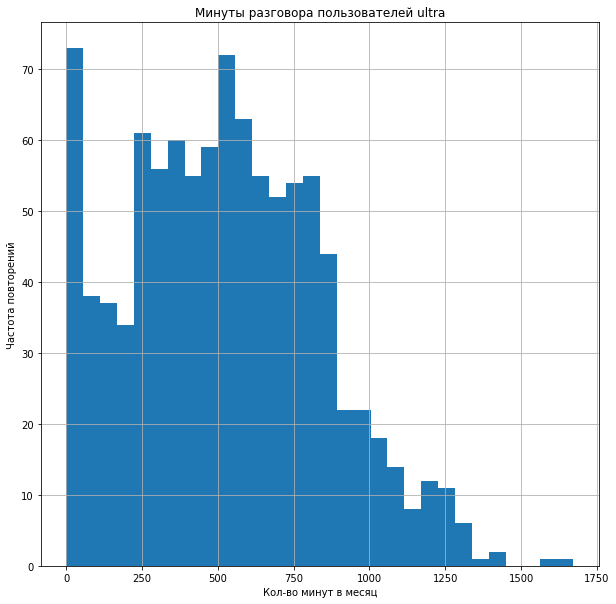

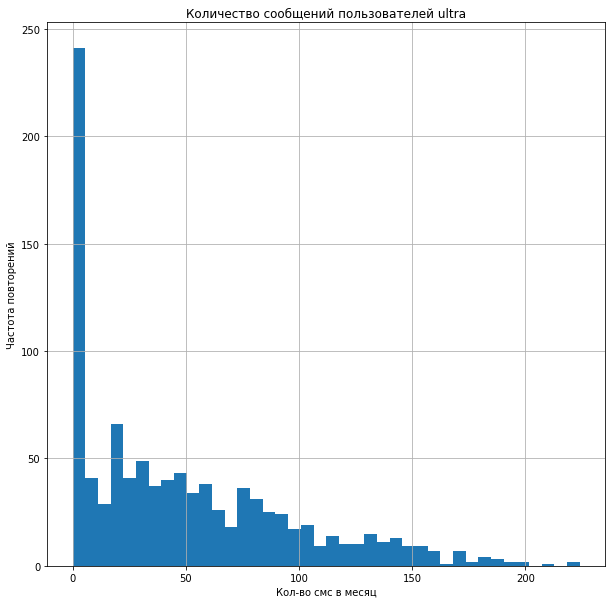

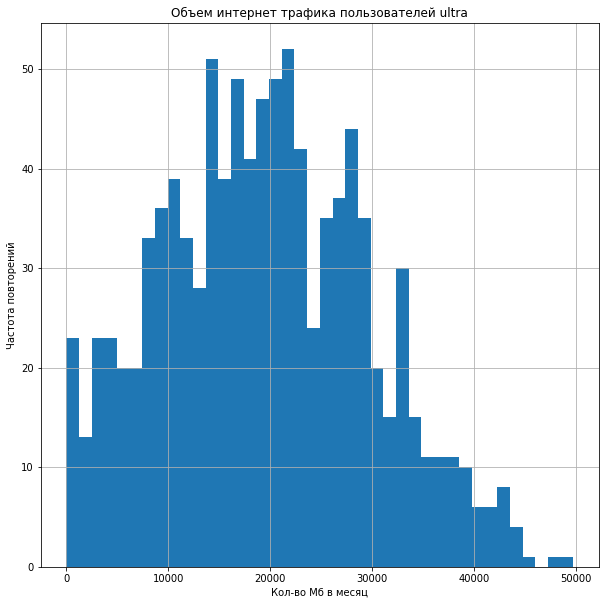

In [67]:
hist_dict = {'call_duration': {'bins': 30,  'title': 'Минуты разговора пользователей ultra', 'x': 'Кол-во минут в месяц', 'y': 'Частота повторений'},'number_of_messages': {'bins': 40,  'title': 'Количество сообщений пользователей ultra', 'x': 'Кол-во смс в месяц', 'y': 'Частота повторений'}, 'mb_used': {'bins': 40,  'title': 'Объем интернет трафика пользователей ultra', 'x': 'Кол-во Мб в месяц', 'y': 'Частота повторений'}}
for key, value in hist_dict.items():
    ultra[key].hist(bins=value['bins'], figsize = (10, 10))
    plt.title(value['title'])
    plt.xlabel(value['x'])
    plt.ylabel(value['y'])
    plt.show()

Рассмотрим пиковые значения, стремящиеся к нулю, ближе.

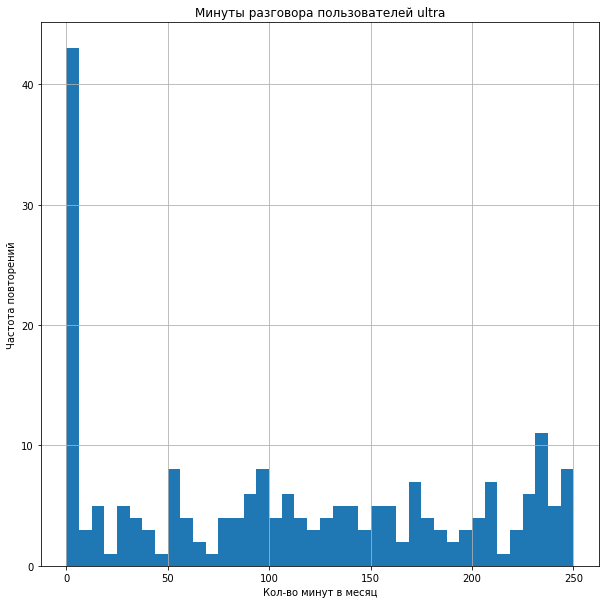

In [68]:
ultra['call_duration'].hist(bins=value['bins'], range = (0, 250), figsize = (10, 10)) 
plt.title('Минуты разговора пользователей ultra')
plt.xlabel('Кол-во минут в месяц')
plt.ylabel('Частота повторений')
plt.show()

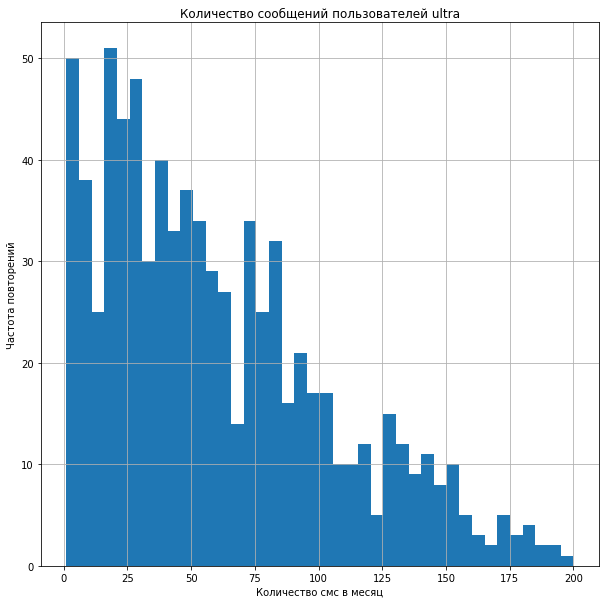

In [69]:
ultra['number_of_messages'].hist(bins=value['bins'], range = (1, 200), figsize = (10, 10)) 
plt.title('Количество сообщений пользователей ultra')
plt.xlabel('Количество смс в месяц')
plt.ylabel('Частота повторений')
plt.show()

Гистограма звонков тарифа Ультра имеет в целом нормальное распределение, но мы видим два пика: часто это оказываются пропущенные звонки или пользователи разговаривают около 520 минут в месяц.

На гистограме с количеством сообщений мы уменьшили ранг, чтобы исключить 0 значения, которыми были заполнены пропуски. Однако самый высокий пик также приходится на значения, близкие к нулю, - около 20 сообщений в месяц. Данные при этом скошены вправо.

Пользователи тарифа Ультра чаще всего используют 22000 Мб в месяц или 21,4 Гб. Данная гистограма имеет нормальное распределение.

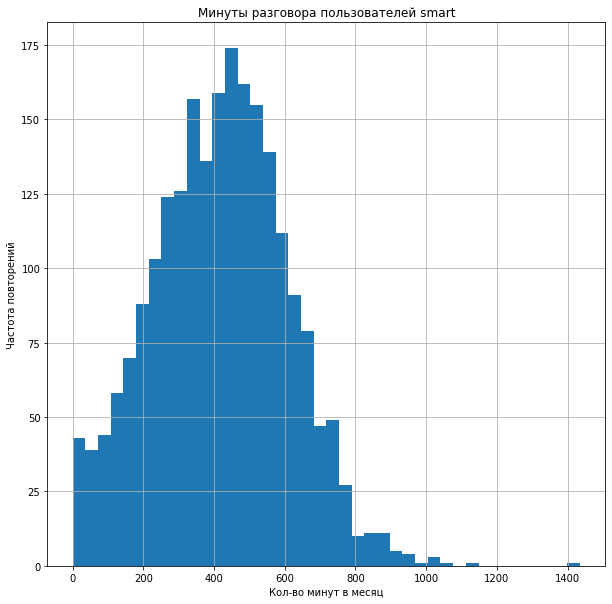

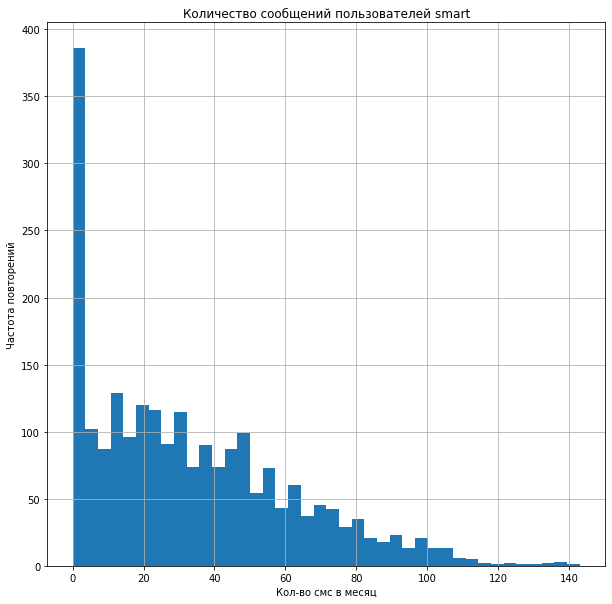

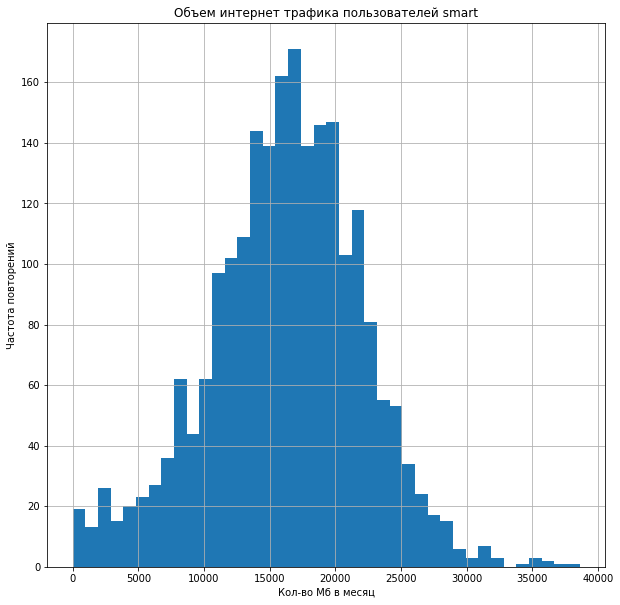

In [70]:
hist_dict = {'call_duration': {'bins': 40,  'title': 'Минуты разговора пользователей smart', 'x': 'Кол-во минут в месяц', 'y': 'Частота повторений'},'number_of_messages': {'bins': 40,  'title': 'Количество сообщений пользователей smart', 'x': 'Кол-во смс в месяц', 'y': 'Частота повторений'}, 'mb_used': {'bins': 40,  'title': 'Объем интернет трафика пользователей smart', 'x': 'Кол-во Мб в месяц', 'y': 'Частота повторений'}}
for key, value in hist_dict.items():
    smart[key].hist(bins=value['bins'], figsize = (10, 10))
    plt.title(value['title'])
    plt.xlabel(value['x'])
    plt.ylabel(value['y'])
    plt.show()

На гистограме с количеством сообщений уменьшаем ранг, чтобы исключить 0 значения, которыми были заполнены пропуски.

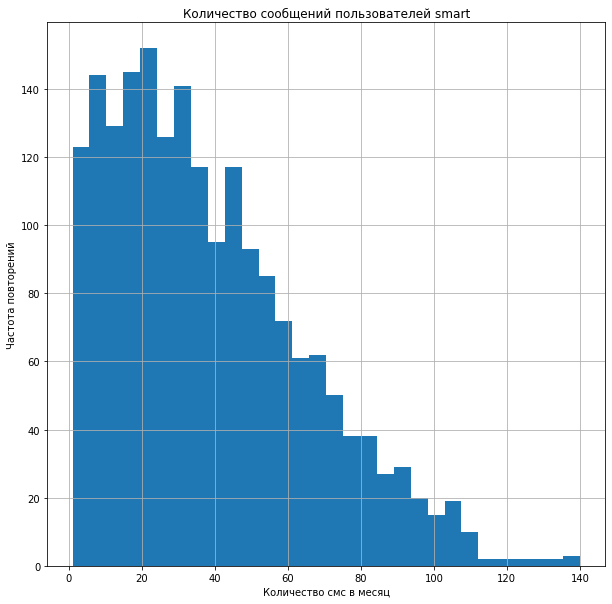

In [71]:
smart['number_of_messages'].hist(bins=30, range = (1, 140), figsize = (10, 10)) 
plt.title('Количество сообщений пользователей smart')
plt.xlabel('Количество смс в месяц')
plt.ylabel('Частота повторений')
plt.show()

Пользователи тарифа Смарт чаще всего используют 450 минут в месяц на звонки. Гистограма имеет нормальное распределение и скошена влево, то есть в сторону меньших значений.

Гистограма с количеством сообщений имеет пуассоновское распределение: большинство значений приближены к нулю, далее их кол-во сокращается. Пик приходится на значение около 20.

Чаще всего пользователи тарифа Смарт используют примерно 16000 Мб или 15,6 Гб в месяц. Гистограма имеет нормальное распределение.

Text(0, 0.5, 'Частота повторений')

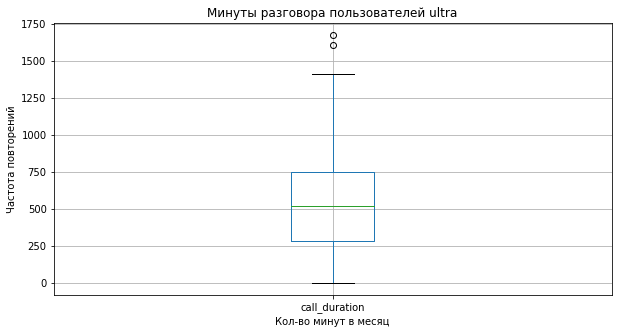

In [72]:
ultra.boxplot(column = 'call_duration', figsize=(10,5))
plt.title('Минуты разговора пользователей ultra')
plt.xlabel('Кол-во минут в месяц')
plt.ylabel('Частота повторений')

Text(0, 0.5, 'Частота повторений')

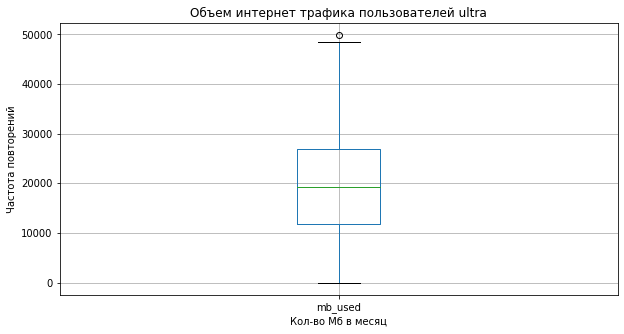

In [73]:
ultra.boxplot(column = 'mb_used', figsize=(10,5))
plt.title('Объем интернет трафика пользователей ultra')
plt.xlabel('Кол-во Мб в месяц')
plt.ylabel('Частота повторений')

Text(0, 0.5, 'Частота повторений')

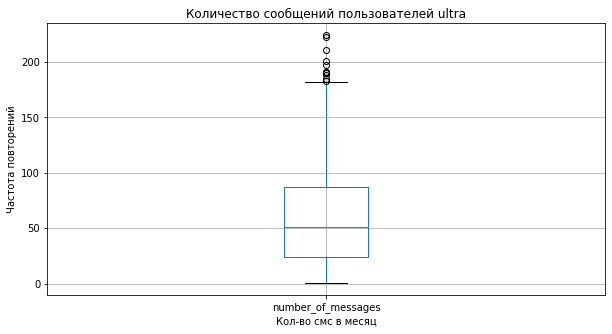

In [74]:
ultra.query('number_of_messages > 0').boxplot(column = 'number_of_messages', figsize=(10,5))
plt.title('Количество сообщений пользователей ultra')
plt.xlabel('Кол-во смс в месяц')
plt.ylabel('Частота повторений')

Text(0, 0.5, 'Частота повторений')

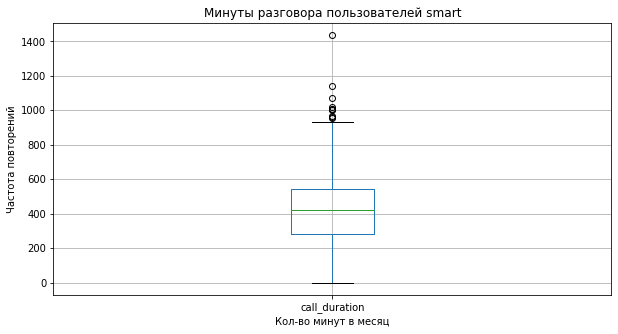

In [75]:
smart.boxplot(column = 'call_duration', figsize=(10,5))
plt.title('Минуты разговора пользователей smart')
plt.xlabel('Кол-во минут в месяц')
plt.ylabel('Частота повторений')

Text(0, 0.5, 'Частота повторений')

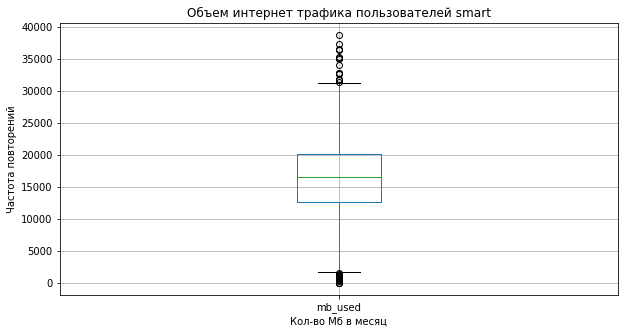

In [76]:
smart.boxplot(column = 'mb_used', figsize=(10,5))
plt.title('Объем интернет трафика пользователей smart')
plt.xlabel('Кол-во Мб в месяц')
plt.ylabel('Частота повторений')

Text(0, 0.5, 'Частота повторений')

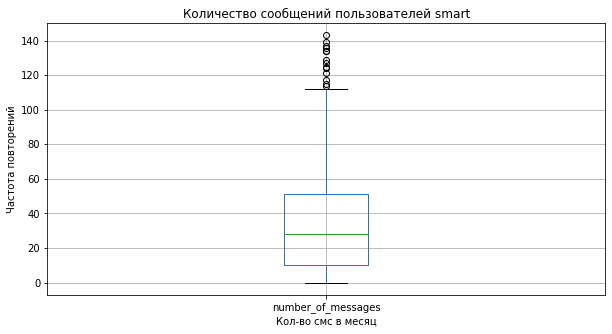

In [77]:
smart.boxplot(column = 'number_of_messages', figsize=(10,5))
plt.title('Количество сообщений пользователей smart')
plt.xlabel('Кол-во смс в месяц')
plt.ylabel('Частота повторений')

Так как мы заполняли пропуски нулями, отбросим эти значения.

Text(0, 0.5, 'Частота повторений')

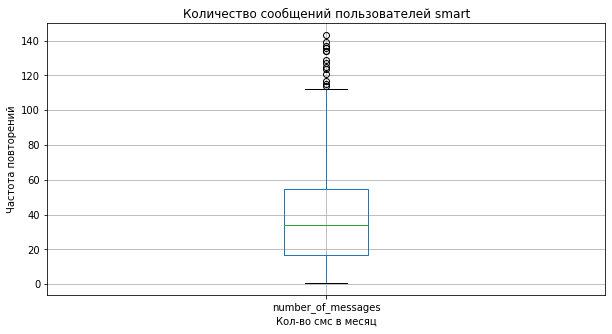

In [78]:
smart.query('number_of_messages > 0').boxplot(column = 'number_of_messages', figsize=(10,5))
plt.title('Количество сообщений пользователей smart')
plt.xlabel('Кол-во смс в месяц')
plt.ylabel('Частота повторений')

Диаграммы распределения показали, что количество выбивающихся значений невелико. Пользователи тарифа Ультра редко используют более 1400 минут на звонки, более 180 смс и более 49000 Мб, т.е. 47,8 Гб. 

Пользователи тарифа Смарт редко используют более 950 минут звонков, 112 смс, 31000 Мб. Также редкостью является, если интернет-трафик расходуется меньше, чем на 2000 Мб.

#### Вывод

Дисперсия данных, характеризующих пользователей тарифа Ультра, немного больше чем у пользователей тарифа Смарт. Т.е. поскольку разброс данных среди пользователей двух тарифов различается, мы все еще не можем однозначно определить насколько случайной оказалась более высокая выручка тарифа Смарт.

Распределения в целом оказались нормальными. Гистограма распределений сообщений показала пуассоновское распределение.

Вместе с этим, можно сделать вывод о том, что большинство пользователей тарифа Ультра практически не используют пакет минут и смс, а пользователям тарифа Смарт недостаточно включенных в тарифный пакет опций.

### Шаг 4. Проверьте гипотезы

### 4.1


Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Поэтому формулируем следующим образом.
### Нулевая гипотеза:
##### Средняя выручка пользователей из Москвы равна средней выручке пользователей других регионов.
### Альтернативная гипотеза:
##### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Проверим нулевую гипотезу по регионам. Для этого создадим срезы данных: первый включает город Москва, второй включет другие регионы.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод `scipy.stats.ttest_ind (array1, array2, equal_var)`.

In [79]:
moscow_tariff = revenue.query('city == "Москва"')
region_tariff = revenue.query('city != "Москва"')

In [80]:
moscow_tariff_r = moscow_tariff['revenue'].mean() # Находим среднюю выручку в зависмости от региона
region_tariff_r = region_tariff['revenue'].mean()
print(moscow_tariff_r)
print(region_tariff_r)

1508.6205937440784
1526.180494920707


In [81]:
moscow = moscow_tariff['revenue']
region = region_tariff['revenue']

print('Средняя выручка по Москве: ', pd.Series(moscow).mean())
print('Средняя выручка в других регионах: ', pd.Series(region).mean())

moscow_var = moscow_tariff['revenue'].var()
region_var = region_tariff['revenue'].var()
print('Дисперсия данных по Москве:', moscow_var)
print('Дисперсия данных в остальных регионах:', region_var)
alpha = 0.05 # Критический уровень значимости задаем 5%

results = st.ttest_ind(
          moscow,
          region,
          equal_var = False # т.к. дисперсии выборок неравны, передаем параметру значение False
)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')  

Средняя выручка по Москве:  1508.6205937440784
Средняя выручка в других регионах:  1526.180494920707
Дисперсия данных по Москве: 714924.445246946
Дисперсия данных в остальных регионах: 678459.4433344469
p-значение:  0.852704661468162
Не получилось отвергнуть нулевую гипотезу


Полученное значения p-value для тарифов в Москве и других регионах говорит о том, что хотя средняя выручка имела различие, с вероятностью в почти 85% такое или большее различие можно получить случайно.

### 4.2 

Аналогично проверяем гипотезу зависимости выручки от тарифа.
### Нулевая гипотеза: 
##### Средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".
### Альтернативная гипотеза: 
##### Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

In [82]:
tariff_smart = revenue.query('tariff == "smart"')
tariff_ultra = revenue.query('tariff == "ultra"')

In [83]:
t_smart = tariff_smart['revenue']
t_ultra = tariff_ultra['revenue']

print('Средняя выручка по Москве тарифа Смарт: ', pd.Series(t_smart).mean())
print('Средняя выручка в других регионах тарифа Смарт: ', pd.Series(t_ultra).mean())

t_smart_var = tariff_smart['revenue'].var()
t_ultra_var = tariff_ultra['revenue'].var()
print('Дисперсия данных тарифа Смарт:', t_smart_var)
print('Дисперсия данных тарифа Ультра:', t_ultra_var)
alpha = 0.05

t_results = st.ttest_ind(
          t_smart,
          t_ultra,
          equal_var = False # # т.к. дисперсии выборок неравны, передаем параметру значение False
)
print('p-значение: {:,.20f}'.format(t_results.pvalue))
if t_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя выручка по Москве тарифа Смарт:  1711.5817278400611
Средняя выручка в других регионах тарифа Смарт:  1077.7626226309112
Дисперсия данных тарифа Смарт: 705787.1100754774
Дисперсия данных тарифа Ультра: 354226.7691773331
p-значение: 0.00000000000000000013
Отвергаем нулевую гипотезу


Эмпирически полученные данные противоречат нулевой гипотезе. Полученное значение p-value говорит о том, что различная выручка, которую мы нашли в начале исследования, с вероятностью в несколько раз меньше 0.1% могла получиться случайно. 

#### Вывод

Мы выяснили, что существует большая вероятность получения случайного различия выручки среди регионов. Данные нулевой гипотезе не противоречат, мы её не отвергаем. То есть, вероятнее всего средняя выручка пользователей из Москвы равна средней выручке пользователей других регионов.  

При этом наблюдается зависимость выручки от тарифа - Смарт или Ультра, так как была найдена крайне малая вероятность того, что различия выручки получились случайно.

### Общий вывод

Прежде чем ответить на вопрос о том, какой тариф приносит больше прибыли, была произведена предобработка данных: заполнены пропуски, изменены типы данных с вещественного на целочисленный в значениях с минутами и мегабайтами. Даты были переведены также в соответствующий тип данных.

Затем была расчитана помесячная выручка с каждого пользователя, из чего мы сделали вывод, что выручка, принесенная пользователями тарифа Смарт значительно больше, чем от пользователей тарифа Ультра.

Анализ распределения данных показал, что распредлеления в целом являются нормальными. Показатели разброса данных, характеризующих пользователей тарифа Ультра, оказались немного выше чем у пользователей тарифа Смарт. Этот анализ также показал, что большинство пользователей тарифа Ультра практически не используют пакет минут и смс, а пользователям тарифа Смарт не хватает включенных в тарифный пакет опций.

Чтобы определить, являются ли различия в выручке в какой-то мере закономерностью или они полностью случайны, мы проверили гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Итак, можно сделать вывод, что существует большая вероятность получения случайного различия выручки среди регионов. То есть, вероятнее всего средняя выручка пользователей из Москвы равна средней выручке пользователей других регионов.

Но при этом наблюдается зависимость выручки от тарифа - Смарт или Ультра, так как была найдена крайне малая вероятность того, что различия выручки получились случайно. Таким образом, можем предположить, что тариф Смарт приносит большую прибыль, чем тариф Ультра.